In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binom,uniform

In [5]:
head_count = np.arange(0,101,1)
head_probs = np.arange(0,1.01,0.01)

In [8]:
bayesian_df = pd.DataFrame([(x,y) for x in head_count for y in head_probs])
bayesian_df.columns=["num_heads","head_prob"]

In [14]:
bayesian_df["prior"] = uniform.pdf(bayesian_df["head_prob"])
bayesian_df["likelihood"] = binom.pmf(bayesian_df["num_heads"],100,bayesian_df["head_prob"])
bayesian_df["likelihood"]  /= bayesian_df["likelihood"].sum()

c:\Users\Ertuğrul\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='head_prob', ylabel='likelihood'>

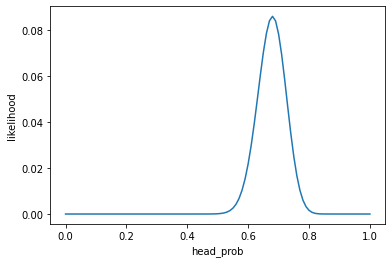

In [19]:
## 68 heads in 100 coin flip
coin_flip_68 = bayesian_df[bayesian_df["num_heads"]==68]
sns.lineplot(coin_flip_68["head_prob"],coin_flip_68["likelihood"]/coin_flip_68["likelihood"].sum())

In [20]:
coin_flip_68.loc[coin_flip_68.likelihood == coin_flip_68.likelihood.max(), 'head_prob']

6936    0.68
Name: head_prob, dtype: float64